For my research I am using proability density functions that indicate the probability of certain events happening. Based on these probability density functions expectations are formed by integrating over the probability space. In the end this leads me to implications of how markets behave.

However, central to the understanding of models that involve probability density functions is the understanding of their properties. There are various ways in how to define probability density functions depending on the type of function used. The commonly applied normal distribution is for example characterized by its mean and standard deviation. For other pdfs the defining parameters may be completely different. Nevertheless, all pdfs can be characterized and compared based on statistical properties and these are called moments.

In this article I will try to get an understanding of the definition of moments and numerically prove their definitions for various functions.

This script shall help in understanding the calcualtion and meaning of moments. Therefore I will start with the numerical calculation for one dimensional probability functions and try different shapes of probability functions. In a next step I will apply the calculations to multi-dimensional probability spaces. All calcultions are based on the Python package scipy.stats package and can be retraced based on the Jupyter notebook.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/matplotlib-1.5.0-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


I will start by using the most common probability function, namely a normal distribution with mean value 0 and standard deviation of 1.

In [2]:
distribution = stats.norm()

In order to plot the function we have to define a range of x values which can be done using the inverse of the cumulative density function. This function comes with the scipy stats package and be called by using ppf. Here we will use a range from 0.001 to 0.999 cumulative probability for the definition of our x values. Because the returned values of the scipy module are not normalized to our respective $x$ values, we have to normalize them manually.

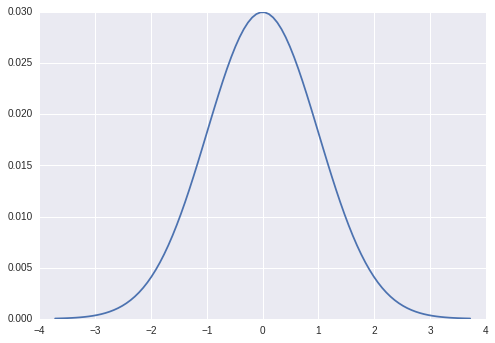

In [3]:
x = np.linspace(distribution.ppf(0.0001),distribution.ppf(0.9999), 100)
y = distribution.pdf(x)
y /= y.sum()
plt.plot(x, y)

Now we will come to the definition of moments. Based on [Wikipedia](https://en.wikipedia.org/wiki/Moment_%28mathematics%29) moments are defined as:

$\mu_n=\int_{-\infty}^\infty (x - c)^n\,f(x)\,dx.$

This means moments are always defined in reference to a value $c$ and can have different orders which are defined by $n$. The zeroth moment is the total probability (i.e. one), the first moment is the mean, the second central moment is the variance, the third moment is the skewness, and the fourth moment (with normalization and shift) is the kurtosis.
Commonly, raw moments refer to a the reference value of $c=0$ and central moments to the reference value of $c=\mu_1$, with $\mu_1$ being the mean of the probability distribution. The central moments are commonly used to describe the properties of a pdf.

In the case of the normal distribution the moments can numerically be calculated by making use of our pre-defined arrays $x$ and $y$.

In [4]:
zeroth_moment = sum(x[i]**0*y[i] for i in range(len(x)))
first_moment = sum(x[i]**1*y[i] for i in range(len(x)))
second_moment = sum(x[i]**2*y[i] for i in range(len(x)))
third_moment = sum(x[i]**3*y[i] for i in range(len(x)))
fourth_moment = sum(x[i]**4*y[i] for i in range(len(x)))
print("The zeroth moment is " + str(zeroth_moment))
print("The mean (first moment) is " + str(first_moment))
print("The variance (second moment) is " + str(second_moment))
print("The skewness (third moment) is " + str(third_moment))
print("The kurtosis (fourth moment) is " + str(fourth_moment))

The zeroth moment is 1.0
The mean (first moment) is 1.40078920685e-16
The variance (second moment) is 0.997421840541
The skewness (third moment) is 5.01335084557e-16
The kurtosis (fourth moment) is 2.95585217592


In the example we calculated the raw moments but for the standard normal distribution these are identical with the central moment because the mean value is zero. The numerically calculated value of the mean (first moment) is also close to zero and for the variance (second moment) we obtain a value close to one. The skewness is a measure for the symmetry of the distribution and because the standard normal distribution is symmetric this is zero. The kurtosis is a somewhat different measure that indicates the tailedness of the distribution. For a standard normal distribution this measure is 3, which we also closely obtain via numerical calculation.

We can now define a function for the raw and central moments based on the previous steps in order to analyze the properties of different pdfs.

In [5]:
def get_x_y(distribution):
    x = np.linspace(distribution.ppf(0.0001),distribution.ppf(0.9999), 100)
    y = distribution.pdf(x)
    y /= y.sum()
    return x,y

def get_raw_moment(distribution,n):
    x,y = get_x_y(distribution)    
    raw_moment = sum(x[i]**n*y[i] for i in range(len(x)))
    return raw_moment

def get_central_moment(distribution,n):
    x,y = get_x_y(distribution) 
    mean = sum(x[i]**1*y[i] for i in range(len(x)))
    central_moment = sum((x[i]-mean)**n*y[i] for i in range(len(x)))
    return central_moment
    

For being able to compare different shapes of distributions, we have to derive the [standardized moments](https://en.wikipedia.org/wiki/Standardized_moment) of the distribution. These are defined as the central moments divided by the standard deviation.

In [6]:
def get_standardized_moment(distribution,n):
    x,y = get_x_y(distribution)
    mean = sum(x[i]**1*y[i] for i in range(len(x)))
    variance = sum((x[i]-mean)**2*y[i] for i in range(len(x)))
    standardized_moment = sum((x[i]-mean)**n*y[i] for i in range(len(x)))/(np.sqrt(variance))**n
    return standardized_moment

In addition we will define a function that plots the respective distribution and adds the properties of the distribution to a graph.

In [7]:
def plot_distribution(distribution,ax):
    x,y = get_x_y(distribution)
    ax.plot(x,y,label="pdf")
    mean = get_raw_moment(distribution,1)
    variance = get_central_moment(distribution,2)
    std = np.sqrt(variance)
    skewness = round(get_standardized_moment(distribution,3)*100)/100
    kurtosis = round(get_standardized_moment(distribution,4)*100)/100
    ax.set_ylabel("Probability")
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    # plot the first moment (mean)
    ax.vlines(mean,ymin,ymax, color='r', label="mean")
    # plot a measure for the second moment (standard deviation)
    ax.vlines(mean + std,ymin,ymax, color='g', label="std")
    ax.vlines(mean - std,ymin,ymax, color='g')
    # add text for the third and fourth moment
    ax.set_xlabel("Skewness: " + str(skewness) + ", Kurtosis: " + str(kurtosis))
    # add a legend
    ax.legend()
    # adjust x and y lim again
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    return ax 

For the normal distribution we were using from the beginning of this article the plot looks as follows:

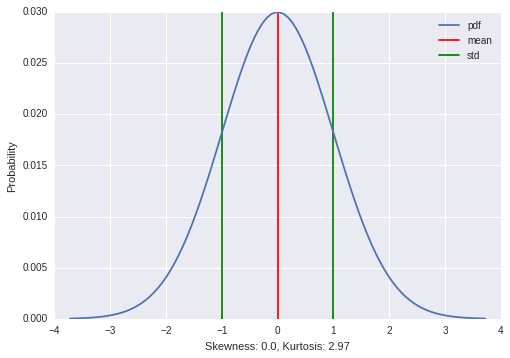

In [8]:
fig, ax = plt.subplots()
ax = plot_distribution(distribution, ax)

Now we can plot distributions and their properties and make them comparable based on the moments. We will plot the following distributions:
* Normal distribution with mean 2 and standard deviation 0.5
* Lognormal standard distribution
* Frechet left (or Weibull maximum) distribution
* Frechet right (or Weibull minimum) distribution

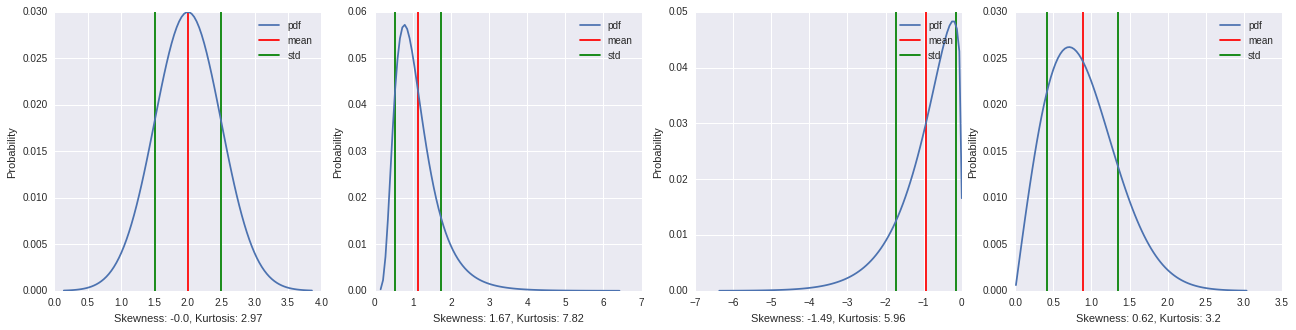

In [9]:
distributions = [stats.norm(2,0.5), stats.lognorm(0.5), stats.weibull_max(1.2), stats.weibull_min(2)]
fig, ax = plt.subplots(1,len(distributions), figsize=(22,5))
for i in range(len(distributions)):
    ax[i] = plot_distribution(distributions[i], ax[i])    

As we can see, depending on the shape of the distributions, the mean, standard deviation and skewness and kurtosis vary. The code can now be used to analyze different shapes of distributions. The corresponding Jupyter notebook can be found [here](let_me_think_one_moment_1.ipynb). In the next article we will look into the measures for multivariate probability distributions.